 # Heart Failure Prediction using Classification

### Step 1: Data Collection

In [2]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Step 2: Data Visualisation

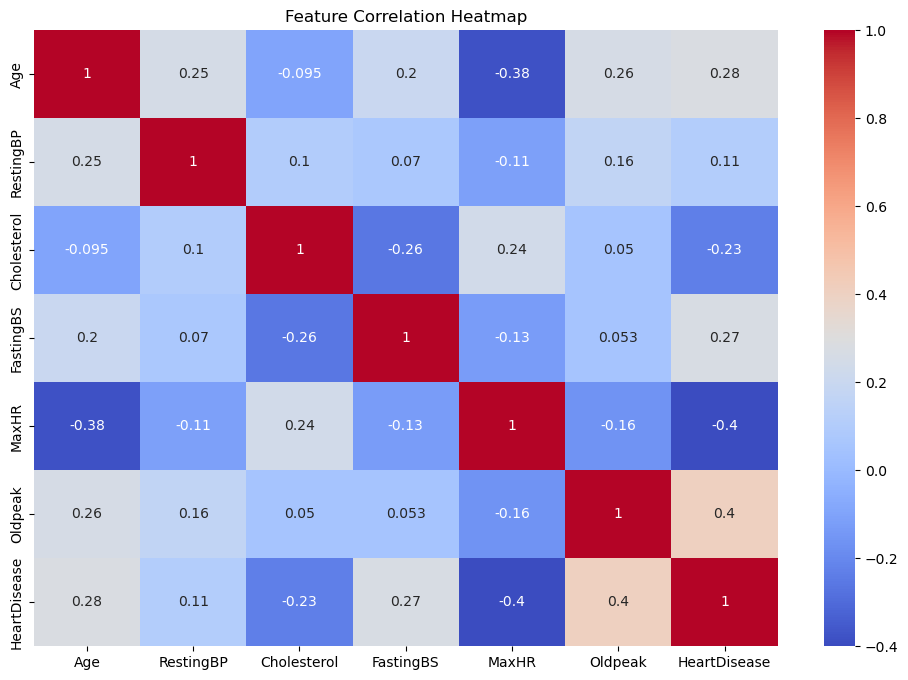

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = df.select_dtypes(include=['number']).columns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

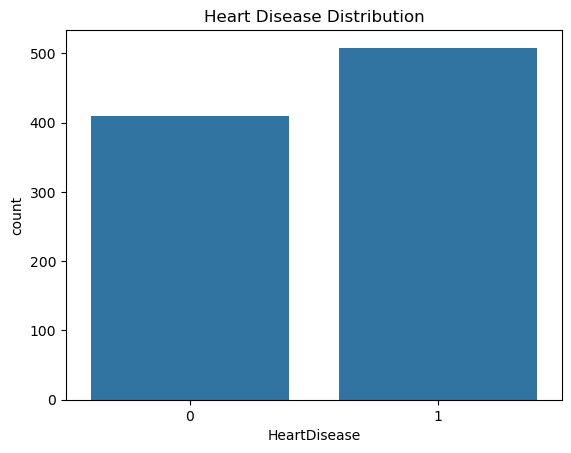

In [6]:
# Count plot for the target
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

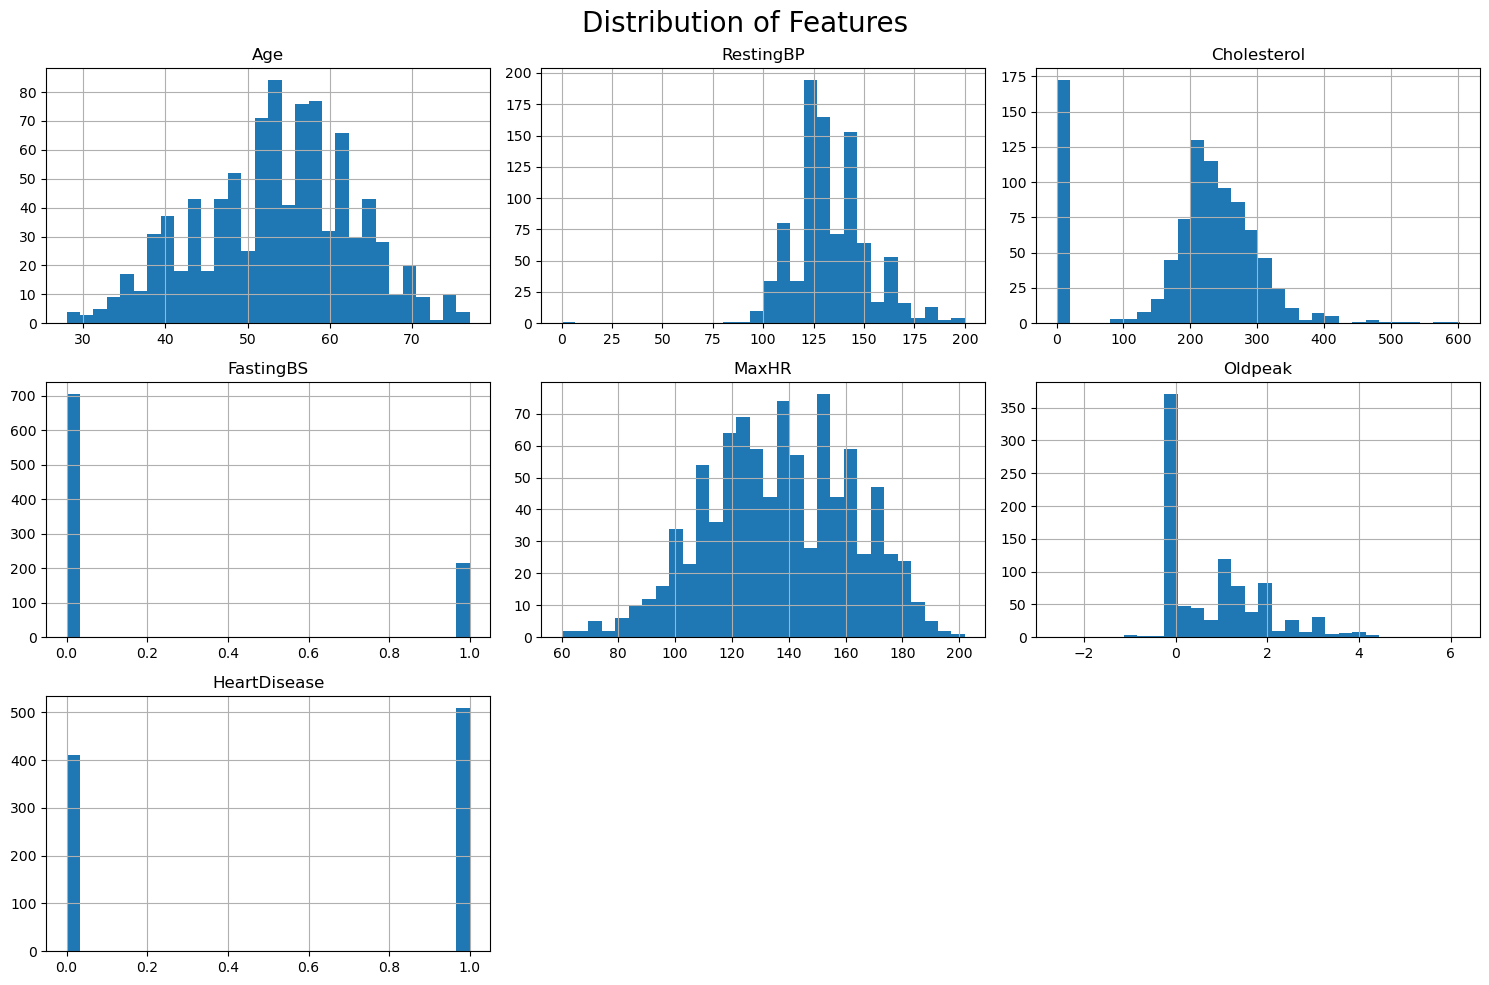

In [7]:
# Distribution of numeric features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Features", fontsize=20)
plt.tight_layout()
plt.show()

### Step 3: Data Cleaning

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# Check unique values in categorical columns
for col in df.select_dtypes(include='object'):
    print(col, df[col].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


### Step 4: Data Transformation(Encoding + Scaling)

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['ST_Slope', 'RestingECG', 'ChestPainType','ExerciseAngina'], drop_first=True)

# Label Encoding
df_encoded['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('HeartDisease', axis=1))

# Splitting data
X = pd.DataFrame(scaled_features, columns=df_encoded.columns[:-1])
y = df_encoded['HeartDisease']

In [11]:
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y
0,40,1,140,289,0,172,0.0,0,False,True,True,False,True,False,False,False
1,49,0,160,180,0,156,1.0,1,True,False,True,False,False,True,False,False
2,37,1,130,283,0,98,0.0,0,False,True,False,True,True,False,False,False
3,48,0,138,214,0,108,1.5,1,True,False,True,False,False,False,False,True
4,54,1,150,195,0,122,0.0,0,False,True,True,False,False,True,False,False


### Step 5: Initial Model Training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Training Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Step 6: Model Evaluation

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

accuracy_score(y_test, y_pred)

0.8532608695652174

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



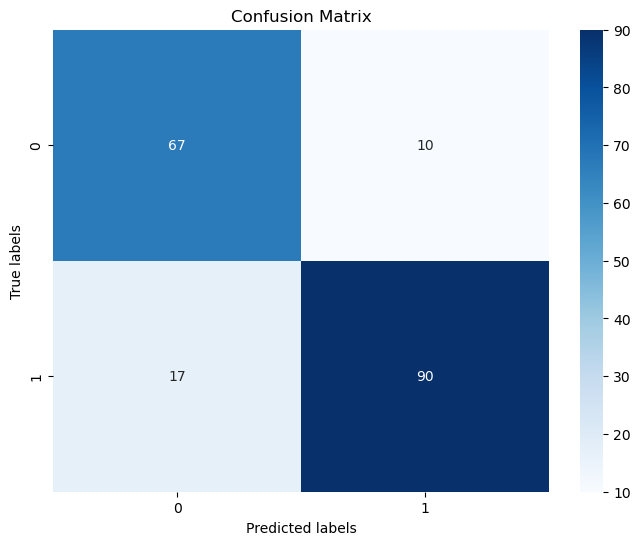

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')  # Customize as desired
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

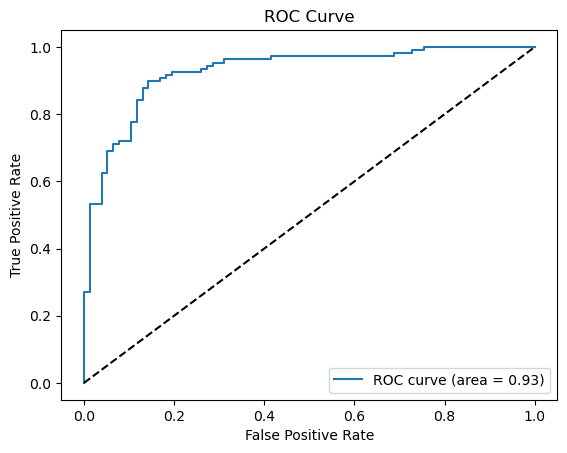

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba[:, -1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba[:, -1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Step 7: Hyperparameter Tuning

**GridSearchCV**

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [20, 60, 100, 120],
    'max_depth': [2, 8, None],
    'max_features': [0.2, 0.6, 1.0],
    'max_samples': [0.5, 0.75, 1.0],
}

grid = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters: ", grid.best_estimator_)

Best Parameters:  RandomForestClassifier(max_features=0.2, max_samples=1.0, n_estimators=120,
                       random_state=42)


In [18]:
best_grid_model = grid.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)

print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [19]:
accuracy_score(y_test, y_pred_grid)

0.875

**RandomizedSearchCV**

In [20]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

random_cv = RandomizedSearchCV(rf, param_dist, cv=5, scoring='accuracy', n_iter=50, verbose=1, n_jobs=-1)
random_cv.fit(X_train, y_train)
print("Best parameters: ", random_cv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 261}


In [21]:
best_random_model = random_cv.best_estimator_

y_pred_random = best_random_model.predict(X_test)

print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [22]:
accuracy_score(y_test, y_pred_random)

0.8695652173913043

The GridSearchCV best estimators has the best metric scores...

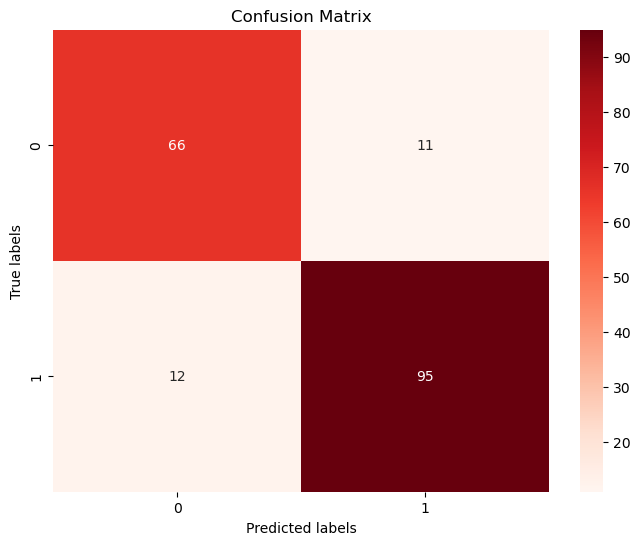

In [23]:
cm_grid = confusion_matrix(y_test, y_pred_grid)

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(cm_grid, annot=True, cmap='Reds', fmt='d')  # Customize as desired
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

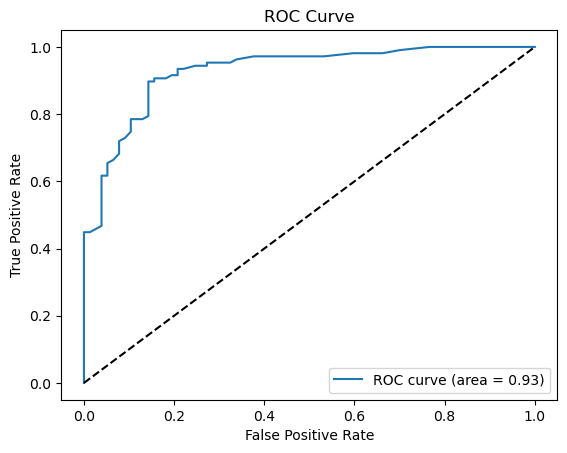

In [24]:
y_proba_grid = best_grid_model.predict_proba(X_test)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_grid[:, -1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_grid[:, -1]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Step 8: Feature Selection and Model Interpretation

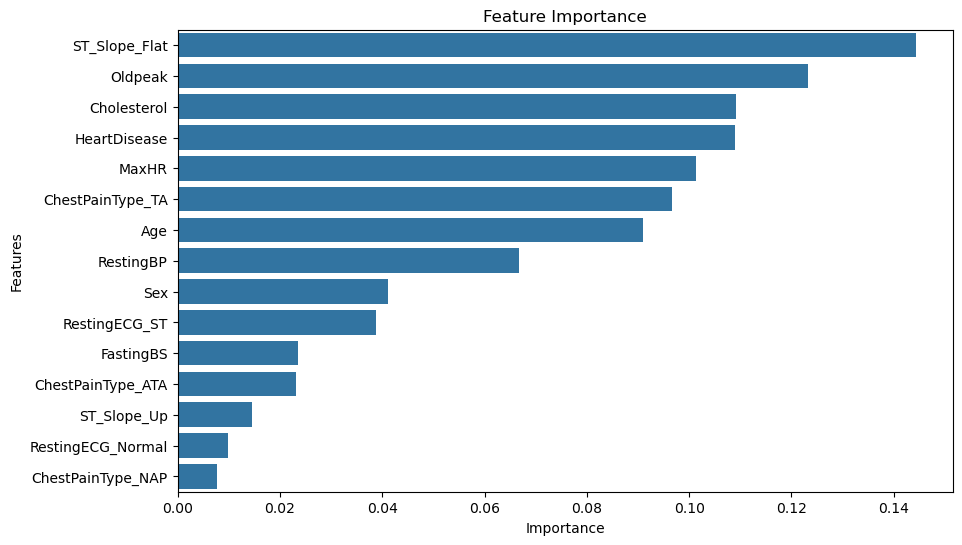

In [25]:
importances = best_grid_model.feature_importances_
features = X.columns

features_importance_df = pd.DataFrame({'Features': features, 'Importance': importances})
features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=features_importance_df)
plt.title("Feature Importance")
plt.show()